# KBinsDiscretizer

```python
from sklearn.preprocessing import KBinsDiscretizer
```

---

## 🔍 **Apa itu `KBinsDiscretizer`?**

`KBinsDiscretizer` adalah **transformer** dari pustaka `scikit-learn` yang digunakan untuk **mengubah data numerik kontinu menjadi data kategorikal (diskret)** dengan cara membagi nilai-nilai fitur ke dalam beberapa *bin* atau *interval*.

Discretization ini sering disebut juga **binning**.

---

## 🧩 **Mengapa digunakan?**

* Untuk **mengubah fitur numerik menjadi kategorikal**, misalnya untuk digunakan dalam model seperti `CategoricalNB`.
* Untuk **mengurangi noise** atau menyederhanakan model.
* Untuk **eksperimen model**: apakah model bekerja lebih baik dengan data kontinu atau diskret?

---

## 🧪 **Sintaks Umum:**

```python
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(
    n_bins=3,              # Jumlah bin (interval) per fitur
    encode='ordinal',      # Tipe encoding hasil: 'ordinal', 'onehot', atau 'onehot-dense'
    strategy='kmeans'      # Strategi pembagian bin: 'uniform', 'quantile', atau 'kmeans'
)

discretizer.fit(X_train)             # Hanya dilatih pada data training
X_train_disc = discretizer.transform(X_train)
X_test_disc = discretizer.transform(X_test)
```

---

## ⚙️ **Parameter Penting:**

| Parameter  | Penjelasan                                                                                                                                                                                           |
| ---------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `n_bins`   | Jumlah bin atau kategori yang ingin dibuat. Bisa integer (untuk semua kolom) atau array (per kolom).                                                                                                 |
| `encode`   | Cara hasil dikeluarkan:<br>- `'ordinal'`: hasil berupa angka kategori (0, 1, 2...)<br>- `'onehot'`: hasil dalam bentuk sparse matrix one-hot<br>- `'onehot-dense'`: one-hot dalam bentuk dense array |
| `strategy` | Cara pembagian bin:<br>- `'uniform'`: panjang interval sama<br>- `'quantile'`: setiap bin berisi jumlah data hampir sama<br>- `'kmeans'`: menggunakan clustering K-Means untuk menentukan bin        |

---

## 📦 **Contoh:**

Misalkan ada data:

```python
import numpy as np
X = np.array([[1], [5], [7], [8], [10]])
```

Jika digunakan:

```python
from sklearn.preprocessing import KBinsDiscretizer
disc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_disc = disc.fit_transform(X)
```

Maka `X_disc` akan mengubah nilai-nilai menjadi kategori seperti:

```
[[0.]
 [1.]
 [2.]
 [2.]
 [2.]]
```

---

## ✅ **Catatan Penting:**

* Hanya **fit() pada data training**, lalu **transform() untuk data training dan testing** agar tidak terjadi data leakage.
* Cocok digunakan saat model membutuhkan **data kategorikal**, atau saat ingin **eksperimen kinerja model** pada data diskret.


## 1. Data Integration

### 📥 Import dan Penyimpanan Awal Data Iris dari CSV ke Google Drive

In [3]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Import pustaka yang dibutuhkan
import pandas as pd
from google.colab import files

# 3. Upload file CSV (delimiter ;)
uploaded = files.upload()

# 4. Baca nama file dan parsing dengan delimiter titik koma
filename = next(iter(uploaded))
df = pd.read_csv(filename, delimiter=';')

# 5. Tampilkan 5 baris pertama
print("📄 Data Iris:")
display(df.head())

# 6. Simpan kembali dengan format standar CSV (pakai koma) ke Google Drive
output_path = '/content/drive/MyDrive/iris_cleaned.csv'
df.to_csv(output_path, index=False)

print(f"✅ File berhasil disimpan ke Google Drive: {output_path}")

Mounted at /content/drive


Saving Iris.csv to Iris (1).csv
📄 Data Iris:


,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,Iris-setosa,5.1,3.5,1.4,0.2
1,2,Iris-setosa,4.9,3.0,1.4,0.2
2,3,Iris-setosa,4.7,3.2,1.3,0.2
3,4,Iris-setosa,4.6,3.1,1.5,0.2
4,5,Iris-setosa,5.0,3.6,1.4,0.2


✅ File berhasil disimpan ke Google Drive: /content/drive/MyDrive/iris_cleaned.csv


## 2. Data Cleaning

### 🧹 Pembersihan Data Iris: Missing Values, Duplikat, dan Nilai Tidak Valid

In [5]:
# 1. Cek missing values
print("🟡 Jumlah missing values per kolom:")
print(df.isnull().sum())

# 2. Drop baris dengan missing values (jika ada)
df = df.dropna()
print("\n✅ Missing values dihapus. Ukuran data sekarang:", df.shape)

# 3. Cek dan hapus duplikat
duplicate_count = df.duplicated().sum()
print(f"\n🔁 Jumlah data duplikat: {duplicate_count}")
df = df.drop_duplicates()
print("✅ Duplikat dihapus. Ukuran data sekarang:", df.shape)

# 4. Deteksi nilai tidak valid
# Kita asumsikan panjang/lebar kelopak dan daun tidak mungkin negatif atau nol
invalid_values = df[
    (df['SepalLengthCm'] <= 0) |
    (df['SepalWidthCm'] <= 0) |
    (df['PetalLengthCm'] <= 0) |
    (df['PetalWidthCm'] <= 0)
]

print(f"\n🚫 Jumlah baris dengan nilai tidak valid: {len(invalid_values)}")

# Tampilkan nilai-nilai tidak valid (jika ada)
if len(invalid_values) > 0:
    display(invalid_values)
    # Hapus nilai tidak valid
    df = df[
        (df['SepalLengthCm'] > 0) &
        (df['SepalWidthCm'] > 0) &
        (df['PetalLengthCm'] > 0) &
        (df['PetalWidthCm'] > 0)
    ]
    print("✅ Nilai tidak valid dihapus. Ukuran data sekarang:", df.shape)
else:
    print("✅ Tidak ada nilai tidak valid.")


🟡 Jumlah missing values per kolom:
Id               0
Species          0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

✅ Missing values dihapus. Ukuran data sekarang: (150, 6)

🔁 Jumlah data duplikat: 0
✅ Duplikat dihapus. Ukuran data sekarang: (150, 6)

🚫 Jumlah baris dengan nilai tidak valid: 0
✅ Tidak ada nilai tidak valid.


## 3. Data Transformation

### 🔀 Pembagian Dataset Iris Menjadi Data Latih dan Data Uji (70:30)

In [6]:
from sklearn.model_selection import train_test_split

# Tentukan kolom numerik
numerical_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Pisahkan fitur (X) dan target (y)
X = df[numerical_cols]       # df adalah data yang sudah dibersihkan
y = df['Species']            # Target (klasifikasi jenis bunga)

# Split data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # Pertahankan proporsi kelas
)

# Tampilkan hasil pembagian data
print("Hasil Data Splitting:")
print(f"- Training set: {X_train.shape[0]} sampel")
print(f"- Testing set: {X_test.shape[0]} sampel")

Hasil Data Splitting:
- Training set: 105 sampel
- Testing set: 45 sampel


In [7]:
print(f"- Distribusi kelas training:\n{y_train.value_counts(normalize=True)}")

- Distribusi kelas training:
Species
Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64


### 🧮 Diskritisasi Fitur Numerik Menggunakan K-Means Clustering

In [8]:
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd

# 1. Inisialisasi discretizer (k-means binning)
discretizer = KBinsDiscretizer(
    n_bins=3,           # Jumlah bin per fitur
    encode='ordinal',   # Output berupa label ordinal
    strategy='kmeans'   # Gunakan clustering k-means untuk diskritisasi
)

# 2. Fitting HANYA pada data training
discretizer.fit(X_train)

# 3. Transform data training dan testing
X_train_disc = discretizer.transform(X_train)
X_test_disc = discretizer.transform(X_test)

# 4. Konversi hasil ke DataFrame
disc_columns = [f"{col}_disc" for col in numerical_cols]
X_train_disc_df = pd.DataFrame(X_train_disc, columns=disc_columns)
X_test_disc_df = pd.DataFrame(X_test_disc, columns=disc_columns)

# 5. Tampilkan contoh hasil diskritisasi
print("\n🔢 Hasil Diskritisasi:")
print("Sample data training setelah diskritisasi:")
display(X_train_disc_df.head())


🔢 Hasil Diskritisasi:
Sample data training setelah diskritisasi:


,SepalLengthCm_disc,SepalWidthCm_disc,PetalLengthCm_disc,PetalWidthCm_disc
0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,1.0
2,0.0,2.0,0.0,0.0
3,2.0,1.0,2.0,2.0
4,1.0,0.0,1.0,1.0


### 📊 Visualisasi Batas Bin Hasil Diskritisasi pada Setiap Fitur Numerik

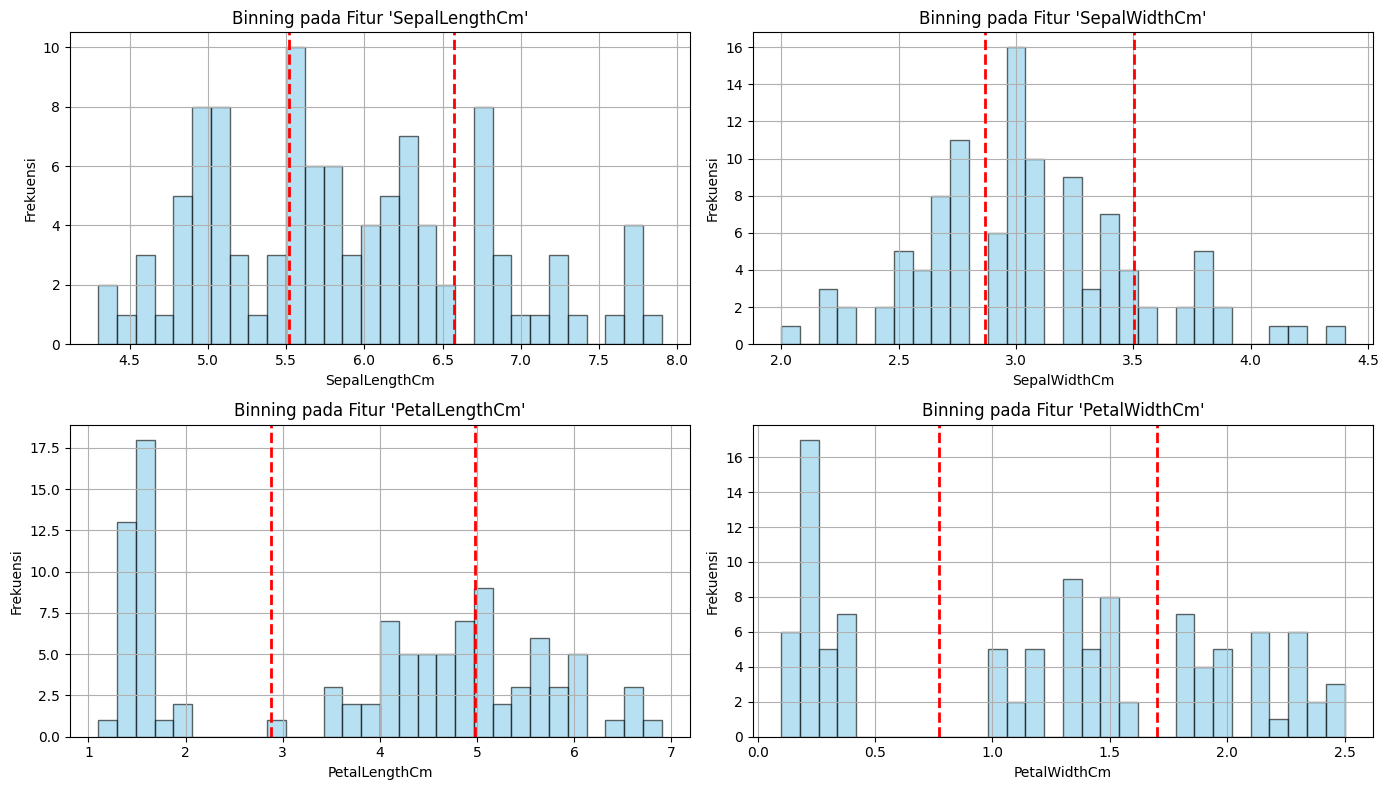

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Ukuran plot
plt.figure(figsize=(14, 8))

# Loop setiap fitur numerik
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)  # 2 baris x 2 kolom subplot

    # Plot histogram untuk fitur asli (X_train[col])
    plt.hist(X_train[col], bins=30, alpha=0.6, color='skyblue', edgecolor='black')

    # Ambil batas bin dari discretizer
    bin_edges = discretizer.bin_edges_[i]

    # Plot garis batas bin
    for edge in bin_edges[1:-1]:  # Kecuali paling kiri dan kanan
        plt.axvline(x=edge, color='red', linestyle='--', linewidth=2)

    plt.title(f"Binning pada Fitur '{col}'")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [10]:
# Menampilkan batas bin untuk setiap fitur
for i, col in enumerate(numerical_cols):
    bin_edges = discretizer.bin_edges_[i]
    print(f"Batas bin untuk fitur '{col}':")
    for j in range(len(bin_edges) - 1):
        print(f"  Bin {j}: {bin_edges[j]:.2f} – {bin_edges[j+1]:.2f}")
    print()

Batas bin untuk fitur 'SepalLengthCm':
  Bin 0: 4.30 – 5.52
  Bin 1: 5.52 – 6.57
  Bin 2: 6.57 – 7.90

Batas bin untuk fitur 'SepalWidthCm':
  Bin 0: 2.00 – 2.87
  Bin 1: 2.87 – 3.50
  Bin 2: 3.50 – 4.40

Batas bin untuk fitur 'PetalLengthCm':
  Bin 0: 1.10 – 2.88
  Bin 1: 2.88 – 4.97
  Bin 2: 4.97 – 6.90

Batas bin untuk fitur 'PetalWidthCm':
  Bin 0: 0.10 – 0.77
  Bin 1: 0.77 – 1.70
  Bin 2: 1.70 – 2.50



### 🤖 Pelatihan dan Evaluasi 4 Model Klasifikasi pada Data Kontinu dan Diskret

In [11]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.tree import DecisionTreeClassifierAC
from sklearn.metrics import accuracy_score, classification_report

# Model 1: GaussianNB pada data kontinu
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test, y_pred_gnb)

# Model 2: Decision Tree pada data kontinu
dt_cont = DecisionTreeClassifier(random_state=42)
dt_cont.fit(X_train, y_train)
y_pred_dt_cont = dt_cont.predict(X_test)
acc_dt_cont = accuracy_score(y_test, y_pred_dt_cont)

# Model 3: CategoricalNB pada data diskret
cnb = CategoricalNB()
cnb.fit(X_train_disc_df, y_train)
y_pred_cnb = cnb.predict(X_test_disc_df)
acc_cnb = accuracy_score(y_test, y_pred_cnb)

# Model 4: Decision Tree pada data diskret
dt_disc = DecisionTreeClassifier(random_state=42)
dt_disc.fit(X_train_disc_df, y_train)
y_pred_dt_disc = dt_disc.predict(X_test_disc_df)
acc_dt_disc = accuracy_score(y_test, y_pred_dt_disc)

# Tampilkan hasil akurasi
print("📊 Akurasi Model:")
print(f"1. GaussianNB (kontinu):         {acc_gnb:.4f}")
print(f"2. Decision Tree (kontinu):      {acc_dt_cont:.4f}")
print(f"3. CategoricalNB (diskret):      {acc_cnb:.4f}")
print(f"4. Decision Tree (diskret):      {acc_dt_disc:.4f}")

# (Opsional) Tampilkan classification report untuk model terbaik
print("\n📄 Classification Report (contoh - Decision Tree Diskret):")
print(classification_report(y_test, y_pred_dt_disc))

📊 Akurasi Model:
1. GaussianNB (kontinu):         0.9111
2. Decision Tree (kontinu):      0.9333
3. CategoricalNB (diskret):      0.9111
4. Decision Tree (diskret):      0.8889

📄 Classification Report (contoh - Decision Tree Diskret):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.78      0.93      0.85        15
 Iris-virginica       0.92      0.73      0.81        15

       accuracy                           0.89        45
      macro avg       0.90      0.89      0.89        45
   weighted avg       0.90      0.89      0.89        45



### 📊 Ringkasan Akurasi Model dalam Format Tabel

In [12]:
# Buat daftar hasil akurasi dalam format persen
results = [
    {"Model": "Naive Bayes",   "Data Type": "Kontinu", "Akurasi (%)": round(acc_gnb * 100, 1)},
    {"Model": "Naive Bayes",   "Data Type": "Diskret", "Akurasi (%)": round(acc_cnb * 100, 1)},
    {"Model": "Decision Tree", "Data Type": "Kontinu", "Akurasi (%)": round(acc_dt_cont * 100, 1)},
    {"Model": "Decision Tree", "Data Type": "Diskret", "Akurasi (%)": round(acc_dt_disc * 100, 1)},
]

# Tampilkan dalam format tabel
print("| Model         | Data Type | Akurasi (%) |")
print("|---------------|-----------|-------------|")
for row in results:
    print(f"| {row['Model']:<13} | {row['Data Type']:<9} | {row['Akurasi (%)']:<11} |")

| Model         | Data Type | Akurasi (%) |
|---------------|-----------|-------------|
| Naive Bayes   | Kontinu   | 91.1        |
| Naive Bayes   | Diskret   | 91.1        |
| Decision Tree | Kontinu   | 93.3        |
| Decision Tree | Diskret   | 88.9        |


Berikut penjelasan dari output tabel berikut:


### 🧠 **Penjelasan Per Model dan Tipe Data**

| **Model**         | **Data Type** | **Penjelasan**                                                                                                                                                                                                                                                                             |
| ----------------- | ------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Naive Bayes**   | **Kontinu**   | Model Gaussian Naive Bayes dilatih pada fitur numerik asli (seperti panjang dan lebar kelopak/daun). Mencapai akurasi 91.1%, yang menunjukkan bahwa distribusi fitur cukup cocok dengan asumsi distribusi normal (Gaussian).                                                               |
| **Naive Bayes**   | **Diskret**   | Model Categorical Naive Bayes dilatih pada data yang telah **didiskretkan** menggunakan **KMeans binning**. Meski informasi data telah disederhanakan menjadi kategori, model masih mempertahankan akurasi **91.1%**, menandakan diskretisasi tidak terlalu mengurangi kualitas informasi. |
| **Decision Tree** | **Kontinu**   | Model Decision Tree bekerja sangat baik pada data kontinu, menghasilkan akurasi **93.3%**. Hal ini karena decision tree mampu membagi rentang nilai kontinu menjadi aturan-aturan (threshold) yang fleksibel dan optimal untuk klasifikasi.                                                |
| **Decision Tree** | **Diskret**   | Saat menggunakan data yang telah didiskretkan, performa decision tree **menurun menjadi 88.9%**. Penurunan ini wajar karena informasi detail dalam nilai kontinu hilang setelah dikategorikan, membuat pohon keputusan kurang fleksibel dalam pemisahan kelas.                             |

---

### 📌 **Kesimpulan Utama**

* Model terbaik dalam eksperimen ini adalah **Decision Tree dengan data kontinu** (akurasi 93.3%).
* **Diskretisasi** menggunakan **KMeans binning** tidak selalu meningkatkan performa model — terkadang justru menurunkan akurasi terutama untuk model yang kuat menangani data kontinu seperti decision tree.
* Namun, untuk model seperti **CategoricalNB**, diskretisasi merupakan **syarat** karena model ini hanya menerima data kategorikal.



### Visualisasi Confusion Matrix (semua model)

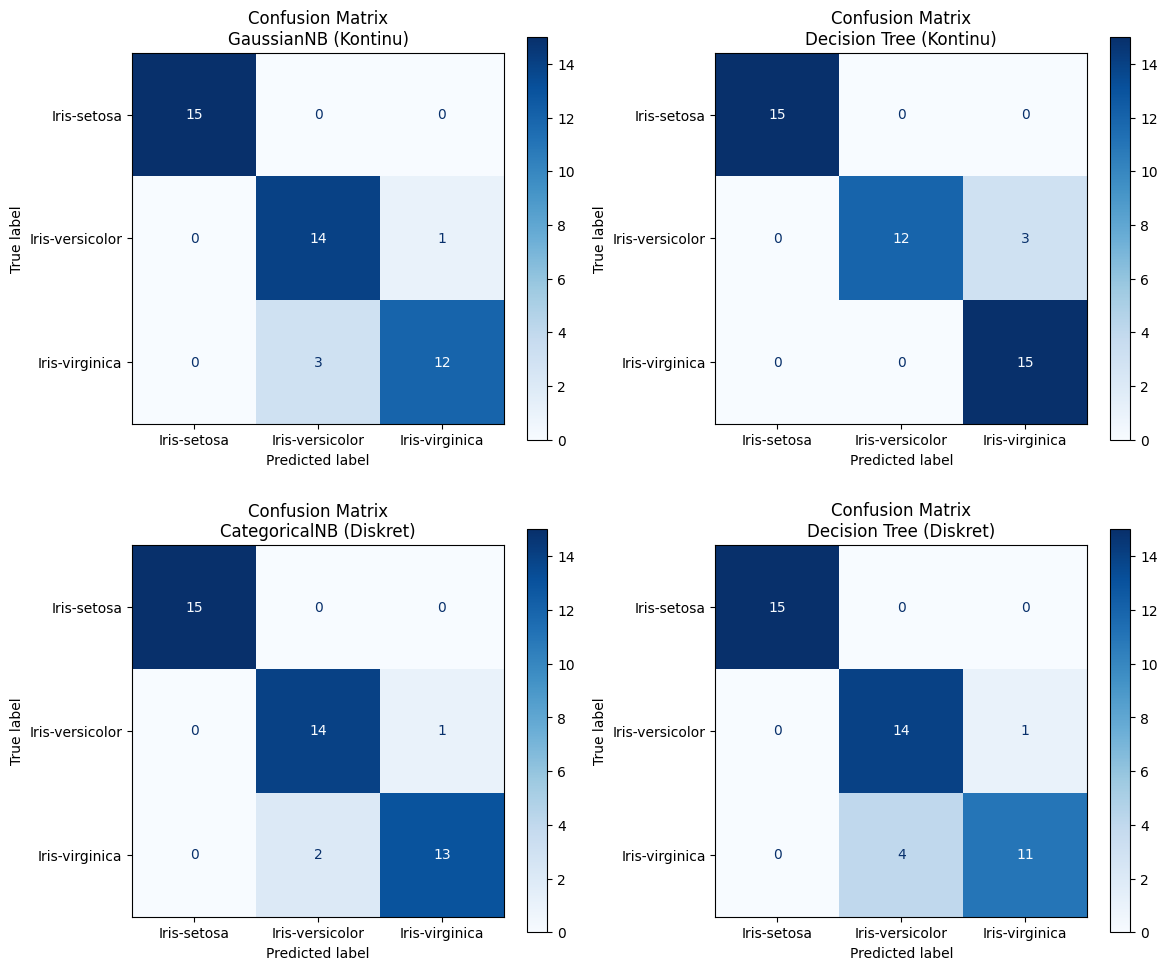

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Daftar model dan prediksinya
models = {
    "GaussianNB (Kontinu)": (y_test, y_pred_gnb),
    "Decision Tree (Kontinu)": (y_test, y_pred_dt_cont),
    "CategoricalNB (Diskret)": (y_test, y_pred_cnb),
    "Decision Tree (Diskret)": (y_test, y_pred_dt_disc)
}

# Plot confusion matrix untuk setiap model
plt.figure(figsize=(12, 10))
for i, (name, (y_true, y_pred)) in enumerate(models.items()):
    plt.subplot(2, 2, i+1)
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=plt.gca(), cmap='Blues')
    plt.title(f"Confusion Matrix\n{name}")
plt.tight_layout()
plt.show()

Visualisasi Pohon Keputusan (pada data kontinu atau diskret)

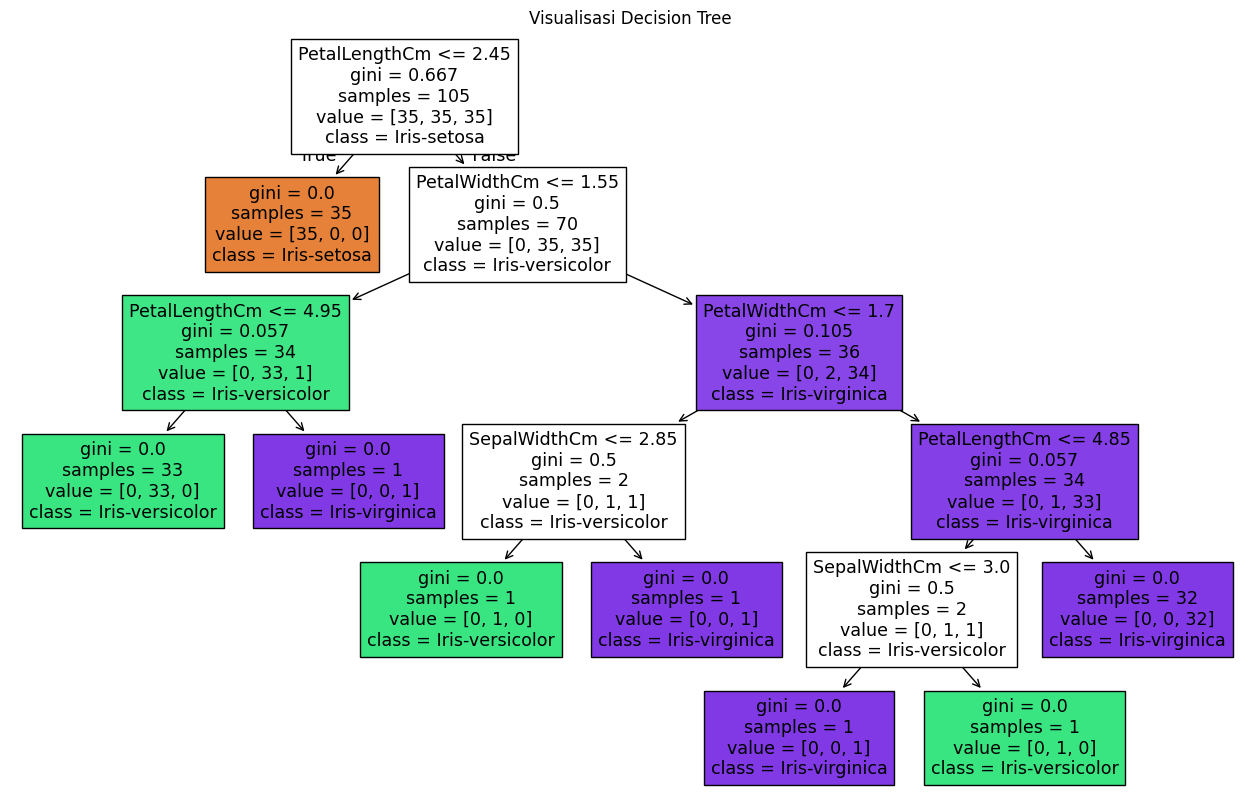

In [21]:
from sklearn.tree import plot_tree

# Ganti ini sesuai model yang ingin divisualisasikan (kontinu atau diskret)
model = dt_cont     # atau dt_disc untuk data diskret
feature_names = X_train.columns if model == dt_cont else X_train_disc_df.columns

plt.figure(figsize=(16, 10))
plot_tree(model, filled=True, feature_names=feature_names, class_names=model.classes_)
plt.title("Visualisasi Decision Tree")
plt.show()

### 🔁 1. Diskritisasi per kolom (bin berbeda)

In [14]:
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd

# Misal: numerical_cols sudah didefinisikan sebelumnya
# Kolom dengan 4 bin
cols_4_bin = ['SepalLengthCm', 'PetalLengthCm']
# Kolom dengan 3 bin
cols_3_bin = [col for col in numerical_cols if col not in cols_4_bin]

# Gabungkan hasil diskretisasi
X_train_disc = pd.DataFrame()
X_test_disc = pd.DataFrame()

# Fungsi bantu diskretisasi
def discretize_column(col, n_bins):
    kbd = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='kmeans')
    kbd.fit(X_train[[col]])
    X_train_col = kbd.transform(X_train[[col]]).astype(int).flatten()
    X_test_col = kbd.transform(X_test[[col]]).astype(int).flatten()
    print(f"📌 Batas bin untuk {col} ({n_bins} bin):")
    print(kbd.bin_edges_[0])
    return X_train_col, X_test_col

# Proses diskretisasi
for col in cols_4_bin:
    X_train_col, X_test_col = discretize_column(col, 4)
    X_train_disc[col + '_disc'] = X_train_col
    X_test_disc[col + '_disc'] = X_test_col

for col in cols_3_bin:
    X_train_col, X_test_col = discretize_column(col, 3)
    X_train_disc[col + '_disc'] = X_train_col
    X_test_disc[col + '_disc'] = X_test_col

print("\n📊 Contoh hasil diskritisasi (ordinal):")
display(X_train_disc.head())

📌 Batas bin untuk SepalLengthCm (4 bin):
[4.3        5.31883929 6.12917582 6.98846154 7.9       ]
📌 Batas bin untuk PetalLengthCm (4 bin):
[1.1        2.70178571 4.38853448 5.43341544 6.9       ]
📌 Batas bin untuk SepalWidthCm (3 bin):
[2.         2.86765152 3.50396104 4.4       ]
📌 Batas bin untuk PetalWidthCm (3 bin):
[0.1       0.7727381 1.6997549 2.5      ]

📊 Contoh hasil diskritisasi (ordinal):


,SepalLengthCm_disc,PetalLengthCm_disc,SepalWidthCm_disc,PetalWidthCm_disc
0,0,1,0,1
1,2,2,0,1
2,0,0,2,0
3,2,3,1,2
4,1,1,0,1


### 🟨 2. Ubah ke Label Kategori

In [15]:
# Label kategori
label_3 = ['rendah', 'sedang', 'tinggi']
label_4 = ['sangat rendah', 'rendah', 'tinggi', 'sangat tinggi']

# Copy dataframe
X_train_disc_cat = X_train_disc.copy()
X_test_disc_cat = X_test_disc.copy()

# Map ke string
for col in X_train_disc_cat.columns:
    if 'SepalLengthCm' in col or 'PetalLengthCm' in col:
        mapping = dict(enumerate(label_4))
    else:
        mapping = dict(enumerate(label_3))
    X_train_disc_cat[col] = X_train_disc_cat[col].map(mapping)
    X_test_disc_cat[col] = X_test_disc_cat[col].map(mapping)

print("\n🔤 Contoh data kategorikal setelah diskret:")
display(X_train_disc_cat.head())


🔤 Contoh data kategorikal setelah diskret:


,SepalLengthCm_disc,PetalLengthCm_disc,SepalWidthCm_disc,PetalWidthCm_disc
0,sangat rendah,rendah,rendah,sedang
1,tinggi,tinggi,rendah,sedang
2,sangat rendah,sangat rendah,tinggi,rendah
3,tinggi,sangat tinggi,sedang,tinggi
4,rendah,rendah,rendah,sedang


### 🟧 3. One-hot Encoding

In [18]:
from sklearn.preprocessing import OneHotEncoder

# Perhatikan: gunakan sparse_output bukan sparse (jika sklearn >= 1.2)
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_encoded = ohe.fit_transform(X_train_disc_cat)
X_test_encoded = ohe.transform(X_test_disc_cat)

encoded_columns = ohe.get_feature_names_out(X_train_disc_cat.columns)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns)

print("\n📦 One-hot encoded feature names:")
print(encoded_columns[:8])
print("\n🔍 Sample encoded training data:")
display(X_train_encoded_df.head())


📦 One-hot encoded feature names:
['SepalLengthCm_disc_rendah' 'SepalLengthCm_disc_sangat rendah'
 'SepalLengthCm_disc_sangat tinggi' 'SepalLengthCm_disc_tinggi'
 'PetalLengthCm_disc_rendah' 'PetalLengthCm_disc_sangat rendah'
 'PetalLengthCm_disc_sangat tinggi' 'PetalLengthCm_disc_tinggi']

🔍 Sample encoded training data:


,SepalLengthCm_disc_rendah,SepalLengthCm_disc_sangat rendah,SepalLengthCm_disc_sangat tinggi,SepalLengthCm_disc_tinggi,PetalLengthCm_disc_rendah,PetalLengthCm_disc_sangat rendah,PetalLengthCm_disc_sangat tinggi,PetalLengthCm_disc_tinggi,SepalWidthCm_disc_rendah,SepalWidthCm_disc_sedang,SepalWidthCm_disc_tinggi,PetalWidthCm_disc_rendah,PetalWidthCm_disc_sedang,PetalWidthCm_disc_tinggi
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### 🧠 4. Latih CategoricalNB & Decision Tree

In [19]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Categorical Naive Bayes
cnb = CategoricalNB()
cnb.fit(X_train_encoded_df, y_train)
y_pred_cnb = cnb.predict(X_test_encoded_df)
acc_cnb = accuracy_score(y_test, y_pred_cnb)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_encoded_df, y_train)
y_pred_dt = dt.predict(X_test_encoded_df)
acc_dt = accuracy_score(y_test, y_pred_dt)

print(f"\n📊 Akurasi CategoricalNB (kategori campuran): {acc_cnb:.2%}")
print(f"📊 Akurasi Decision Tree (kategori campuran):  {acc_dt:.2%}")


📊 Akurasi CategoricalNB (kategori campuran): 93.33%
📊 Akurasi Decision Tree (kategori campuran):  91.11%


### 📌 **Makna Umum:**

Output ini menunjukkan **tingkat akurasi** dari dua model klasifikasi yang dilatih dan diuji menggunakan **data kategori campuran**, yaitu data diskret hasil *binning* (diskritisasi) dari fitur numerik.

---

### 🔍 **1. CategoricalNB (Kategori Campuran): 93.33%**

* **Model yang digunakan:** `CategoricalNB`, yaitu varian dari Naive Bayes yang **dirancang khusus untuk fitur kategorikal**.
* **Data yang digunakan:** Data hasil diskretisasi (`X_train_disc_df`, `X_test_disc_df`) yang berisi nilai kategori hasil binning dari fitur numerik.
* **Akurasi:** Model ini berhasil mengklasifikasikan **93.33% data uji dengan benar**, menunjukkan kinerja yang sangat baik untuk dataset ini.

---

### 🔍 **2. Decision Tree (Kategori Campuran): 91.11%**

* **Model yang digunakan:** `DecisionTreeClassifier`, yaitu model pohon keputusan yang bisa digunakan untuk data numerik maupun kategorikal.
* **Data yang digunakan:** Sama, yaitu data diskret dari hasil binning.
* **Akurasi:** Model ini menghasilkan akurasi **91.11%**, sedikit lebih rendah dibandingkan CategoricalNB.

---

### 📈 **Interpretasi:**

* **CategoricalNB sedikit lebih unggul** dibanding Decision Tree dalam kasus ini saat menggunakan data kategori campuran.
* Ini menunjukkan bahwa **Naive Bayes cukup efektif** saat fitur-fitur input sudah berada dalam bentuk kategori dengan distribusi yang jelas.
* Perbedaan akurasi juga bisa dipengaruhi oleh:

  * Strategi diskretisasi (`kmeans`, `quantile`, atau `uniform`)
  * Ukuran dan distribusi data training
  * Kompleksitas model (Naive Bayes lebih sederhana dibanding Decision Tree)

---

### ✅ **Kesimpulan Sementara:**

Jika tujuanmu adalah klasifikasi berdasarkan fitur numerik yang sudah diubah ke bentuk kategori melalui binning, maka:

* **CategoricalNB bisa menjadi pilihan yang sangat baik** karena sederhana, cepat, dan ternyata akurat.
* Namun, **Decision Tree juga layak dipertimbangkan**, terutama jika kamu ingin interpretabilitas dalam bentuk *rules* atau struktur pohon.
